In [21]:
import numpy as np
import sympy as sym
from sympy import init_printing
from math import sin, cos
import numpy as np
import sympy as sym
from sympy import init_printing
init_printing()


In [15]:
def stress_rotation(phi, theta, rho):

    Rstress = np.asmatrix([
    [ np.cos(phi)*np.cos(theta), -2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi), np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi + rho)/2 + np.sin(-phi + rho + theta)/4 + np.sin(phi - rho + theta)/4],
    [-np.sin(phi)*np.cos(theta),  np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi), np.sin(rho)*np.cos(phi) - np.sin(theta)*np.sin(phi + rho)/2 - np.cos(-phi + rho + theta)/4 + np.cos(phi - rho + theta)/4],
    [         -np.sin(theta),                                                -np.sin(rho)*np.cos(theta),                                                                                    np.cos(rho)*np.cos(theta)]])

    return Rstress

def fault_rotation(xi, delta):
    
    Rfault =  np.asmatrix([
            [ np.cos(delta)*np.cos(xi), np.sin(xi), -np.sin(delta)*np.cos(xi)],
            [-np.sin(xi)*np.cos(delta), np.cos(xi),  np.sin(delta)*np.sin(xi)],
            [         np.sin(delta),       0,          np.cos(delta)]])
    
    return Rfault

def pstress_matrix(sigma_1, sigma_2, sigma_3):
    
    pstress = np.asmatrix([[sigma_1, 0, 0], [0, sigma_2, 0], [0, 0, sigma_3]])
    
    return pstress

def stress_geo(sigma_1, sigma_2, sigma_3, phi, theta, rho):
    
    stressgeo = np.asmatrix([
[                                                                                                                          sigma_1*np.cos(phi)**2*np.cos(theta)**2 + sigma_2*(-2*np.sin(phi)*np.cos(rho/2)**2 + np.sin(phi) + np.sin(rho)*np.sin(theta)*np.cos(phi))**2 + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))**2, -sigma_1*np.sin(phi)*np.cos(phi)*np.cos(theta)**2 + sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi)) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi)), -sigma_1*(-np.sin(phi - 2*theta) + np.sin(phi + 2*theta))/4 - sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*np.cos(rho)*np.cos(theta)],
[-sigma_1*np.sin(phi)*np.cos(phi)*np.cos(theta)**2 + sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi)) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi)),                                                                                                                           sigma_1*np.sin(phi)**2*np.cos(theta)**2 + sigma_2*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi))**2 + sigma_3*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi))**2,   sigma_1*(np.cos(phi - 2*theta) - np.cos(phi + 2*theta))/4 - sigma_2*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi))*np.cos(rho)*np.cos(theta)],
[                                                                    -sigma_1*(-np.sin(phi - 2*theta) + np.sin(phi + 2*theta))/4 - sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*np.cos(rho)*np.cos(theta),                                                                       sigma_1*(np.cos(phi - 2*theta) - np.cos(phi + 2*theta))/4 - sigma_2*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi))*np.cos(rho)*np.cos(theta),                                                                                                                                              sigma_1*np.sin(theta)**2 + sigma_2*np.sin(rho)**2*np.cos(theta)**2 + sigma_3*np.cos(rho)**2*np.cos(theta)**2]])
    
    return stressgeo

def stress_geo(sigma_1, sigma_2, sigma_3, phi, theta, rho):
    
    stressgeo = np.asmatrix([
[                                                                                                                          sigma_1*np.cos(phi)**2*np.cos(theta)**2 + sigma_2*(-2*np.sin(phi)*np.cos(rho/2)**2 + np.sin(phi) + np.sin(rho)*np.sin(theta)*np.cos(phi))**2 + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))**2, -sigma_1*np.sin(phi)*np.cos(phi)*np.cos(theta)**2 + sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi)) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi)), -sigma_1*(-np.sin(phi - 2*theta) + np.sin(phi + 2*theta))/4 - sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*np.cos(rho)*np.cos(theta)],
[-sigma_1*np.sin(phi)*np.cos(phi)*np.cos(theta)**2 + sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi)) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi)),                                                                                                                           sigma_1*np.sin(phi)**2*np.cos(theta)**2 + sigma_2*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi))**2 + sigma_3*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi))**2,   sigma_1*(np.cos(phi - 2*theta) - np.cos(phi + 2*theta))/4 - sigma_2*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi))*np.cos(rho)*np.cos(theta)],
[                                                                    -sigma_1*(-np.sin(phi - 2*theta) + np.sin(phi + 2*theta))/4 - sigma_2*(-2*np.sin(phi)*np.sin(rho/2)**2 + np.sin(phi) - np.sin(rho)*np.sin(theta)*np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(np.sin(phi)*np.sin(rho) + np.sin(theta)*np.cos(phi)*np.cos(rho))*np.cos(rho)*np.cos(theta),                                                                       sigma_1*(np.cos(phi - 2*theta) - np.cos(phi + 2*theta))/4 - sigma_2*(np.sin(phi)*np.sin(rho)*np.sin(theta) - 2*np.sin(rho/2)**2*np.cos(phi) + np.cos(phi))*np.sin(rho)*np.cos(theta) + sigma_3*(-np.sin(phi)*np.sin(theta)*np.cos(rho) + np.sin(rho)*np.cos(phi))*np.cos(rho)*np.cos(theta),                                                                                                                                              sigma_1*np.sin(theta)**2 + sigma_2*np.sin(rho)**2*np.cos(theta)**2 + sigma_3*np.cos(rho)**2*np.cos(theta)**2]])
    
    return stressgeo

def stress_fault(sigma_1, sigma_2, sigma_3, phi, theta, rho, xi, delta):
    
    sf = np.asmatrix([
[(-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*cos(delta)*cos(xi) - ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*sin(delta)*cos(xi) + (-(sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*sin(phi)**2*cos(theta)**2 + sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))**2 + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))**2)*sin(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(delta)*cos(xi))*sin(xi), -(-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(xi)*cos(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*sin(delta)*sin(xi) + (-(sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*sin(phi)**2*cos(theta)**2 + sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))**2 + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))**2)*sin(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(delta)*cos(xi))*cos(xi), (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*cos(delta)],
[ ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*cos(delta)*cos(xi) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*sin(delta)*cos(xi) + ((sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(delta)*sin(xi) + (sigma_1*sin(phi)**2*cos(theta)**2 + sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))**2 + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))**2)*cos(xi) - (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi)*cos(delta))*sin(xi),  -((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(xi)*cos(delta) + (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*sin(delta)*sin(xi) + ((sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(delta)*sin(xi) + (sigma_1*sin(phi)**2*cos(theta)**2 + sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))**2 + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))**2)*cos(xi) - (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi)*cos(delta))*cos(xi), ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) + (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta)],
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  -((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*cos(delta))*sin(delta)*cos(xi) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(delta))*cos(delta)*cos(xi) + ((sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(delta))*sin(xi),                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*cos(delta))*sin(delta)*sin(xi) - ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(delta))*sin(xi)*cos(delta) + ((sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(delta))*cos(xi),                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*cos(delta))*cos(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(delta))*sin(delta)]])
    
    return sf

def taudip(sigma_1, sigma_2, sigma_3, phi, theta, rho, xi, delta):
    
    tdip = -((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta)
    
    return tdip

def taustrike(sigma_1, sigma_2, sigma_3, phi, theta, rho, xi, delta):

    
    ts = (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*cos(delta)
    
    return ts

def Derivatives(sigma_1, sigma_2, sigma_3, phi, theta, rho, xi, delta):
    
    dldxi = (-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta))*(((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) + (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta) - ((-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*cos(delta))*(-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) - (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) - (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*cos(delta))/(-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta)))/((-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta))**2 + ((-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*cos(delta))**2)
    dldd = (-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta))*((-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*cos(delta)*cos(xi))*cos(delta) + (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(delta)*cos(xi))*sin(delta) + (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*cos(delta) - ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*sin(delta) - ((-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*cos(delta))*(-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(xi)*cos(delta))*cos(delta) - ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(delta)*sin(xi))*sin(delta) - ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*cos(delta) + (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*sin(delta))/(-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta)))/((-((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*sin(xi) - (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*sin(xi)*cos(delta) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*cos(xi))*sin(delta) - (-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(xi)*cos(delta) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*cos(xi) + (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*sin(xi))*cos(delta))**2 + ((-(-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*sin(delta)*cos(xi) + (sigma_1*cos(phi)**2*cos(theta)**2 + sigma_2*(-2*sin(phi)*cos(rho/2)**2 + sin(phi) + sin(rho)*sin(theta)*cos(phi))**2 + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))**2)*cos(delta)*cos(xi) + (-sigma_1*sin(phi)*cos(phi)*cos(theta)**2 + sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi)) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi)))*sin(xi))*sin(delta) + ((-sigma_1*(-sin(phi - 2*theta) + sin(phi + 2*theta))/4 - sigma_2*(-2*sin(phi)*sin(rho/2)**2 + sin(phi) - sin(rho)*sin(theta)*cos(phi))*sin(rho)*cos(theta) + sigma_3*(sin(phi)*sin(rho) + sin(theta)*cos(phi)*cos(rho))*cos(rho)*cos(theta))*cos(delta)*cos(xi) + (sigma_1*(cos(phi - 2*theta) - cos(phi + 2*theta))/4 - sigma_2*(sin(phi)*sin(rho)*sin(theta) - 2*sin(rho/2)**2*cos(phi) + cos(phi))*sin(rho)*cos(theta) + sigma_3*(-sin(phi)*sin(theta)*cos(rho) + sin(rho)*cos(phi))*cos(rho)*cos(theta))*sin(xi) - (sigma_1*sin(theta)**2 + sigma_2*sin(rho)**2*cos(theta)**2 + sigma_3*cos(rho)**2*cos(theta)**2)*sin(delta)*cos(xi))*cos(delta))**2)
    return dldd, dldxi

In [16]:
sigma_1, sigma_2, sigma_3, phi, theta, rho, xi, delta = -1, -1/2, -1/4,-np.pi/4, np.pi/2, 0, 0, np.pi/2

In [20]:
def error_prop(dldd, dldxi, dipu, strikeu):
    
    error = np.sqrt((dldd*dipu)**2+(dldxi*strikeu)**2)
    
    return error

In [22]:
def rotation_matrix(axis, rotation_angle):
    
    a = sym.cos(rotation_angle/2)
    b = -axis[0]*sym.sin(rotation_angle/2)
    c = -axis[1]*sym.sin(rotation_angle/2)
    d = -axis[2]*sym.sin(rotation_angle/2)
    
    R = sym.Matrix([[a**2+b**2-c**2-d**2, 2*(b*c-a*d), 2*(b*d+a*c)],[2*(b*c+a*d), a**2+c**2-b**2-d**2, 2*(c*d-a*b)],[2*(b*d-a*c), 2*(c*d+a*b), (a**2+d**2-b**2-c**2)]])

    
    return R


In [23]:
axis_1 = sym.Matrix([[0], [0], [1]])
y =  sym.Matrix([[0], [-1], [0]])
x =  sym.Matrix([[1], [0], [0]])

<p> Create rotation matrix from principal to geograpic </p>

In [24]:
Rphi = rotation_matrix(axis_1, sym.symbols('phi'))

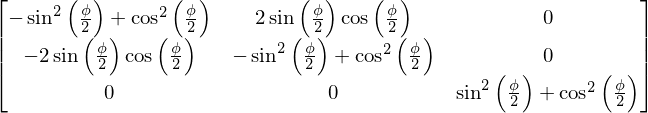

In [25]:
Rphi

In [27]:
yp = Rphi*y
Rtheta = rotation_matrix(yp, sym.symbols('theta'))

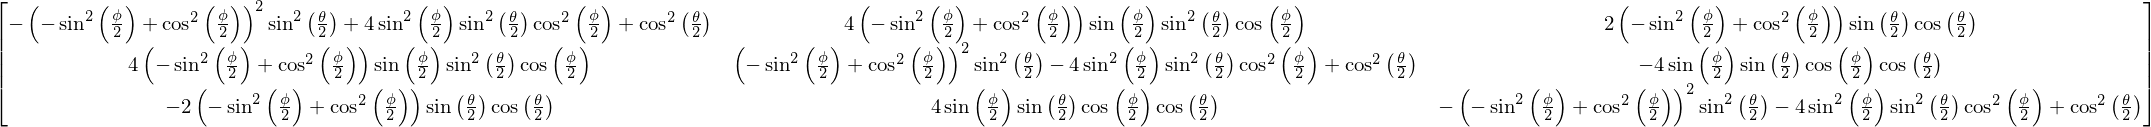

In [28]:
Rtheta

In [29]:
Ri = sym.trigsimp(Rtheta*Rphi)
xpp = sym.trigsimp(Ri*x)
Rrho = rotation_matrix(xpp, sym.symbols('rho'))

In [30]:
Rstress = Rrho*Ri
Rstress = sym.trigsimp(Rstress)

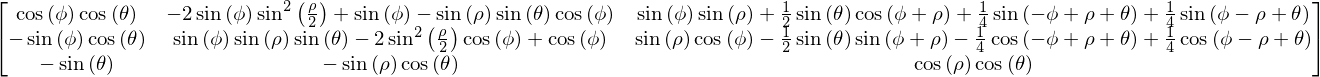

In [32]:
Rstress

In [34]:
Rstresscheck = stress_rotation(-np.pi/4, np.pi/2, 0)
print(Rstresscheck)

[[  4.32978028e-17  -7.07106781e-01   7.07106781e-01]
 [  4.32978028e-17   7.07106781e-01   7.07106781e-01]
 [ -1.00000000e+00  -0.00000000e+00   6.12323400e-17]]


In [35]:
sigma1, sigma2, sigma3 = sym.symbols(['sigma_1','sigma_2','sigma_3'])
pstress = sym.Matrix([[sigma1, 0 , 0], [0, sigma2, 0], [0, 0, sigma3]])
RstressT = sym.transpose(Rstress)
RstressT = sym.trigsimp(RstressT)

stressgeo = Rstress*pstress*RstressT
stressgeo = sym.trigsimp(stressgeo)